In [118]:
#create python tool for sentimental analysis 
import numpy as np
import pandas as pd
import tweepy
import matplotlib.pyplot as plt
import IPython.display 
from IPython.display import display
import seaborn as sns
%matplotlib inline

In [119]:
'''
#twitter access tokens
consumer_key='GTc2RpxcK3Y5wKhAjciEMYbj7'
consumer_secret='9hDJLhr37sQUcKvbdoWCUQD3u8SLX75Mo0DwiSqvBGf0sLUKq0'
access_key='775314049563111424-hmWCttrszUBJ5KBqTJyvR3bzcTkP4As'
sccess_secret='2M00eOoTvAiHjm8NXQYquWprfMgPv9pSRleMbFZlGDEGQ''''


SyntaxError: EOL while scanning string literal (<ipython-input-119-576723b24a88>, line 6)

In [120]:
import sys
sys.path.append('/Users/darshandoshi/Desktop/git-repositiories')
import credentials 
from credentials import *

In [121]:
#twitter api setup
def setup():
    auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_key,sccess_secret)
    api=tweepy.API(auth)
    return api


In [155]:
extract = setup()
tweets = extract.user_timeline(screen_name = 'espn',count = 200)
print('number of tweets extracted : {}',len(tweets))
print('5 recent tweets:')
for t in tweets[:10]:
    print(t.text)
    

number of tweets extracted : {} 200
5 recent tweets:
Blake in a Pistons jersey. Avery Bradley in a Clippers jersey.

It took less than a quarter for double technicals. 👀 https://t.co/WaplwlioRl
Remarkable. (via Dustin Javier/Facebook) https://t.co/ArF0GaBdQq
Kobe Bryant talks to @jemelehill about everything from his reaction to the Eagles winning the Super Bowl to who wou… https://t.co/XgKuotaK2i
Jimmy Garoppolo is getting 💰💰💰 in the first year of his new deal. https://t.co/GcJlsgLmCW
U.S. Soccer defender Geoff Cameron thinks the program needs drastic changes. https://t.co/wA8KNzCUUl
LeBron is happy D-Wade gets to go home. https://t.co/HU9ZzTatHk
Miami has its Dwyane Wade jerseys ready 🔥🔥🔥 (via @darrenrovell) https://t.co/boX4CyvhZi
What's your take? https://t.co/148d43Q8gp
When you upset your arch-rival. https://t.co/G7vTHXqhpk
The Olympics are officially underway 🏅 https://t.co/T8CaoJjVQg


In [156]:
data = pd.DataFrame(data=[tweet.text for tweet in tweets],columns=['tweets'])

In [157]:
display(data.head(10))

,tweets
0,Blake in a Pistons jersey. Avery Bradley in a ...
1,Remarkable. (via Dustin Javier/Facebook) https...
2,Kobe Bryant talks to @jemelehill about everyth...
3,Jimmy Garoppolo is getting 💰💰💰 in the first ye...
4,U.S. Soccer defender Geoff Cameron thinks the ...
5,LeBron is happy D-Wade gets to go home. https:...
6,Miami has its Dwyane Wade jerseys ready 🔥🔥🔥 (v...
7,What's your take? https://t.co/148d43Q8gp
8,When you upset your arch-rival. https://t.co/G...
9,The Olympics are officially underway 🏅 https:/...


In [158]:
#adding relevant data
data['len']=np.array([len(tweet.text) for tweet in tweets])
data['ID']=np.array([tweet.id for tweet in tweets])
data['Date']=np.array([tweet.created_at for tweet in tweets])
data['Source']=np.array([tweet.source for tweet in tweets])
data['Likes']=np.array([tweet.favorite_count for tweet in tweets])
data['RTs']=np.array([tweet.retweet_count for tweet in tweets])

In [159]:
data.head(10)

,tweets,len,ID,Date,Source,Likes,RTs
0,Blake in a Pistons jersey. Avery Bradley in a ...,140,962125280411291648,2018-02-10 00:45:16,Spredfast app,1472,316
1,Remarkable. (via Dustin Javier/Facebook) https...,64,962087484971716608,2018-02-09 22:15:05,Spredfast app,7911,2032
2,Kobe Bryant talks to @jemelehill about everyth...,140,962076180890378241,2018-02-09 21:30:10,Spredfast app,343,65
3,Jimmy Garoppolo is getting 💰💰💰 in the first ye...,89,962062561129611264,2018-02-09 20:36:03,Spredfast app,1582,294
4,U.S. Soccer defender Geoff Cameron thinks the ...,100,962052985063858176,2018-02-09 19:58:00,Spredfast app,1014,168
5,LeBron is happy D-Wade gets to go home. https:...,63,962010065644396544,2018-02-09 17:07:27,Spredfast app,11220,2508
6,Miami has its Dwyane Wade jerseys ready 🔥🔥🔥 (v...,87,961997976079134720,2018-02-09 16:19:25,Spredfast app,14048,2544
7,What's your take? https://t.co/148d43Q8gp,41,961958742760787968,2018-02-09 13:43:31,Spredfast app,1657,209
8,When you upset your arch-rival. https://t.co/G...,55,961954408039944194,2018-02-09 13:26:17,Spredfast app,4043,950
9,The Olympics are officially underway 🏅 https:/...,62,961921409617408001,2018-02-09 11:15:10,Spredfast app,2707,527


In [160]:
def get_fav_tweet():
    max_likes = np.max(data['Likes'])
    fav=data.loc[data['Likes'] == max_likes]

    for i in range(len(fav)):
        print("The tweet with more likes is: \n{}".format(data['tweets'][fav.index[i]]))
        print("Number of likes: \n{}".format(data['Likes'][fav.index[i]]))
    
   

In [161]:
get_fav_tweet()

The tweet with more likes is: 
Grab a tissue. 

Here’s how @RandyMoss reacted when he found out he was headed to Canton. (via @ProFootballHOF) https://t.co/cZzpis0D75
Number of likes: 
137973


In [162]:
def get_rt_tweet():
    max_rt = np.max(data['RTs'])
    rt=data.loc[data['RTs']== max_rt]
    for i in range(len(rt)):
        print("The tweet with more RTs: \n{}".format(data['tweets'][rt.index[i]]))
        print("Number of RTs: \n{}".format(data['RTs'][fav.index[i]]))

In [163]:
get_rt_tweet()

The tweet with more RTs: 
Grab a tissue. 

Here’s how @RandyMoss reacted when he found out he was headed to Canton. (via @ProFootballHOF) https://t.co/cZzpis0D75
Number of RTs: 
316


In [164]:
tlike = pd.Series(data=data['Likes'].values,index=data['Date'])
trt = pd.Series(data=data['RTs'].values,index=data['Date'])
tlen = pd.Series(data=data['len'].values, index=data['Date'])

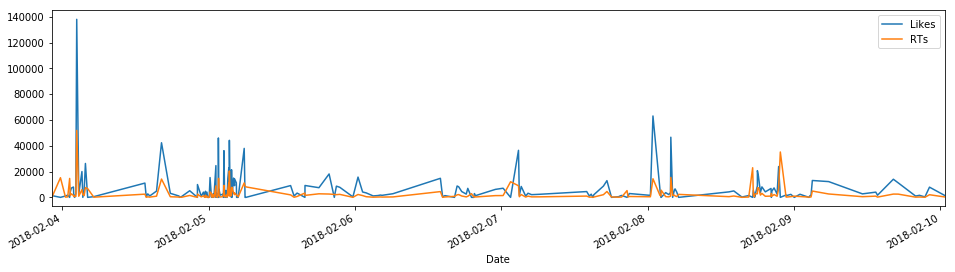

In [166]:
tlike.plot(figsize=(16,4),label="Likes",legend=True);
trt.plot(figsize=(16,4),label="RTs",legend=True);

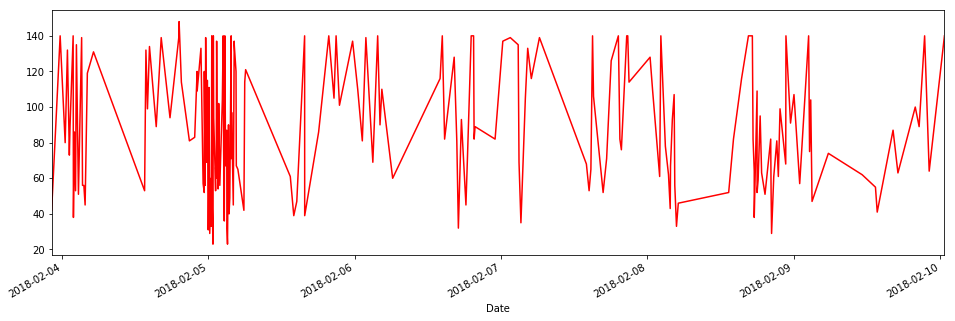

In [167]:
tlen.plot(figsize=(16,5), color='r');

In [168]:
data['Likes'].values

array([  1472,   7911,    343,   1582,   1014,  11220,  14048,   1657,
         4043,   2707,  12221,  13073,   1757,   1168,      0,   2400,
            0,   2321,   1318,   1835,      0,  23899,   2514,   7325,
         4871,      0,   6895,   4259,   8110,   3893,  16458,  20710,
         8921,      0,   1693,   5399,      0,   1425,    249,   4995,
         4257,      0,   4026,   6562,   5930,      0,  46603,   3802,
         2163,   3665,      0,      0,   6008,  63070,   1548,   2972,
         1038,      0,   1499,   1108,    530,      0,  12949,   8735,
         2027,      0,   2472,    988,   4493,   2389,   2095,   3194,
         1012,   8451,   1506,  36450,      0,   7080,   6185,   1298,
         2941,      0,      0,   6985,   2526,   4502,   8201,   8801,
            0,   1351,    471,  14765,   2829,   1583,   1773,   1416,
         1115,   3468,   4153,  15708,    381,   7809,   8680,      0,
        18133,   7495,   9202,      0,   3322,   1084,   9134,      0,
      

In [185]:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Spredfast app
* TweetDeck
* Twitter for iPhone
* Twitter Web Client


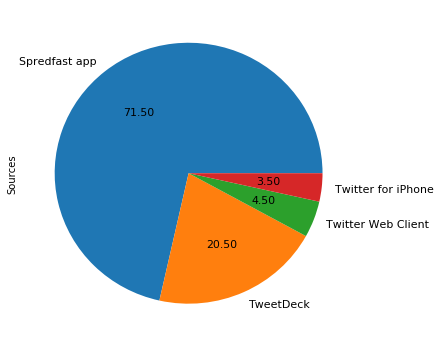

In [187]:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
for source in sources:
    pie_chart = pd.Series(percent, index=np.unique(sources), name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [188]:
data["Source"]

0           Spredfast app
1           Spredfast app
2           Spredfast app
3           Spredfast app
4           Spredfast app
5           Spredfast app
6           Spredfast app
7           Spredfast app
8           Spredfast app
9           Spredfast app
10          Spredfast app
11          Spredfast app
12          Spredfast app
13          Spredfast app
14              TweetDeck
15          Spredfast app
16     Twitter for iPhone
17          Spredfast app
18          Spredfast app
19          Spredfast app
20              TweetDeck
21          Spredfast app
22          Spredfast app
23          Spredfast app
24              TweetDeck
25              TweetDeck
26          Spredfast app
27          Spredfast app
28     Twitter Web Client
29          Spredfast app
              ...        
170         Spredfast app
171         Spredfast app
172    Twitter Web Client
173         Spredfast app
174         Spredfast app
175         Spredfast app
176         Spredfast app
177         